In [2]:
import numpy as np
import scipy
import utils
from utils import HouseHolder, QR, SVD
import scipy.io
import scipy.linalg
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt
import time

%load_ext autoreload
%autoreload 2

In [20]:
def generate_T(n,k):
    delta = 0.1
    diag_element = (2+delta)/(4+delta)
    tridiagonal_element = 1/(4+delta)
    T = np.diag([tridiagonal_element]*(n-1), k = -1)+np.diag([tridiagonal_element]*(n-1), k = 1)+np.identity(n)*(diag_element)
    T_k = np.linalg.matrix_power(T,k)
    return T_k

## testing

In [22]:
#read the pricture
def open_picture(size:str,name:str):
    ''''''
    path = './test_images/'+size+'_'+size+'_'+name    
    im = Image.open(path+'.png')
    img = np.array(im)
    img = img.astype(np.float64) / 255
    return img

In [27]:
#blur the picture
def blur_picture(original_data,blur_type,power):
    m,n,k = original_data.shape
    blur_data = np.zeros((m,n,k))
    if blur_type == 'tridiagonal':
        blur_kernel = generate_T(m,power)
    for i in range(k):
        blur_data[:,:,i]= blur_kernel@original_data[:,:,i]@blur_kernel
    #plt.imshow(blur_data)
    return blur_kernel,blur_data

In [81]:
img_test = open_picture('256','casino')
blur_kernel,blur_data = blur_picture(img_test,'tridiagonal',4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


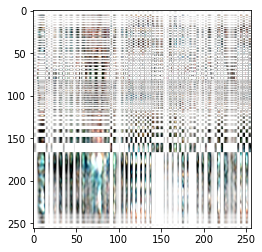

In [84]:
def deblur_picture(blur_kernel,blur_data,trunc):
    m,n,k = blur_data.shape
    deblur_data = np.zeros((m,n,k))
    u,sigma,v = scipy.linalg.svd(blur_kernel)
    tmp_v = v[:,0].reshape((m,-1))
    tmp_u = u[:,0].reshape((-1,m))
    A = (tmp_v@tmp_u)/sigma[0]
    for i in range(1,trunc):
        tmp_v = v[:,i].reshape((m,-1))
        tmp_u = u[:,i].reshape((-1,m))
        A += (tmp_v@tmp_u)/sigma[i]
    for i in range(k):
        deblur_data[:,:,i]= A@blur_data[:,:,i]@A
    return deblur_data

deblur_data = deblur_picture(blur_kernel,blur_data,100)
plt.imshow(deblur_data)



In [54]:
u,sigma,v = SVD.svd(blur_kernel)

(256,)
(256,)
-0.0341893180355937


In [69]:
sigma[0]

0.9996356044970338